In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import plotly.express as px
import time 
import matplotlib.cm as cm
import glob
from PIL import Image

import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point

from sklearn.cluster import MiniBatchKMeans

%matplotlib inline

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

In [6]:
#Use the largest dataset to identify grouping for lat/lon
den_df = pd.read_csv('../../../data/polarbears/pB_dens_1910_2018.csv')

In [7]:
den_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Record              530 non-null    int64  
 1   DenID               530 non-null    int64  
 2   Spring_year         530 non-null    int64  
 3   Data_source         530 non-null    object 
 4   Discovery_method    530 non-null    object 
 5   Latitude            530 non-null    float64
 6   Longitude           530 non-null    float64
 7   Confirmation        530 non-null    object 
 8   Substrate           530 non-null    object 
 9   Position_method     530 non-null    object 
 10  Horizontal_error_m  530 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 45.7+ KB


In [13]:
den_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342315 entries, 0 to 342314
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   bear_id       342315 non-null  object 
 1   GMTdate       342315 non-null  object 
 2   GMTtime       342315 non-null  object 
 3   long          342315 non-null  float64
 4   lat           342315 non-null  float64
 5   raw_act       342315 non-null  float64
 6   standard_act  342315 non-null  float64
 7   active_den    342315 non-null  int64  
 8   habitat       342315 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 23.5+ MB


In [10]:
#Create lat and long df 
df_bear = den_df[['Latitude', 'Longitude']].copy()

In [11]:
# Drop lat/longs of extreme outliers below 0.01 percentile or above 99.99 percentile
df_bear_filtered = df_bear[(df_bear.quantile(0.0001) < df_bear) & (df_bear < df_bear.quantile(0.9999))]
df_bear_filtered = df_bear_filtered.dropna(how='any')

print(f'{df_bear.shape[0] - df_bear_filtered.shape[0]} extreme outliers removed')
print(f'Shape of filtered df_pickup: {df_bear_filtered.shape}')

4 extreme outliers removed
Shape of filtered df_pickup: (526, 2)


## Plot coordinates and clusters onto Map of Arctic Circle

In [20]:
def plot_geolocation_by_cluster(df,cluster,title,centers,filename):
    
    
    # Transform df into geodataframe
    geo_df = gpd.GeoDataFrame(df.drop(['long', 'lat'], axis=1),
                           crs={'init': 'epsg:4326'},
                           geometry=[Point(xy) for xy in zip(df.long, df.lat)])
      
    # Set figure size
    fig, ax = plt.subplots(figsize=(10,5))
    ax.set_aspect('equal')
    
    # Import ArcticShape Files
    world_full = gpd.read_file("../../../data/shapefiles/arctic_full.shp")
    world_full.plot(ax=ax, alpha=0.4, edgecolor='darkgrey', color='lightgrey', zorder=1)
    
    # Plot coordinates from geo_df on top of NYC map
    if cluster is not None:
        geo_df.plot(ax=ax, column=cluster, alpha=0.5, 
                    cmap='viridis', linewidth=0.8, zorder=2)
        if centers is not None:
            centers_gseries = GeoSeries(map(Point, zip(centers[:,0], centers[:,1])))
            centers_gseries.plot(ax=ax, alpha=0.8, color='black', markersize=100, zorder=3)
        
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.ylim(50, 90)
        plt.xlim(-180, -100)
        plt.show()
        
        if filename is not None:
            fig.savefig(f'{filename}', bbox_inches='tight', dpi=300)
    else:
        geo_df.plot(ax=ax, alpha=0.5, cmap='viridis', linewidth=0.8, legend=True, zorder=2)
        plt.title(title)
        plt.xlabel('longitude')
        plt.ylabel('latitude')
        plt.ylim(50, 90)
        plt.show()
        
        
    fig.clf()

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



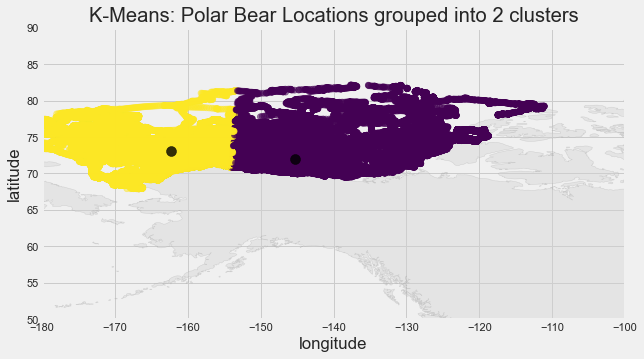

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



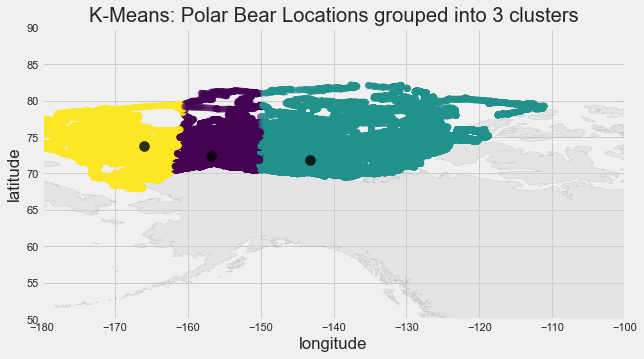

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



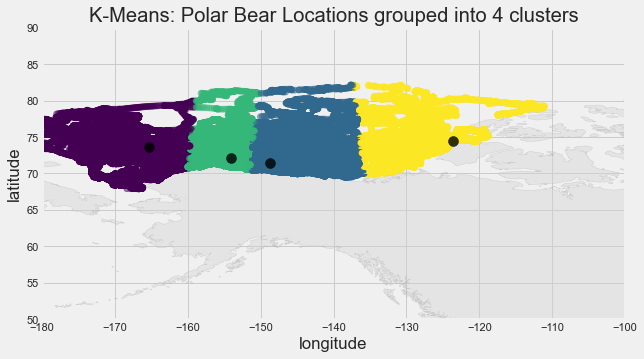

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



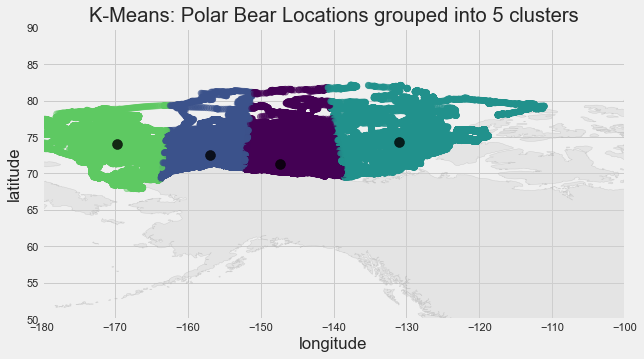

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



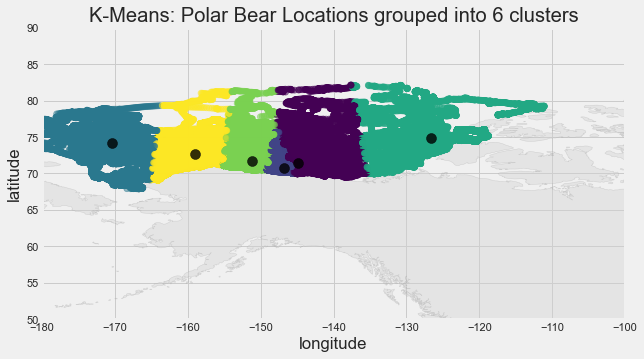

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



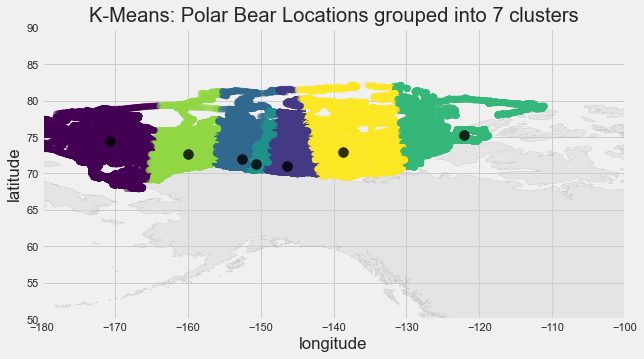

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



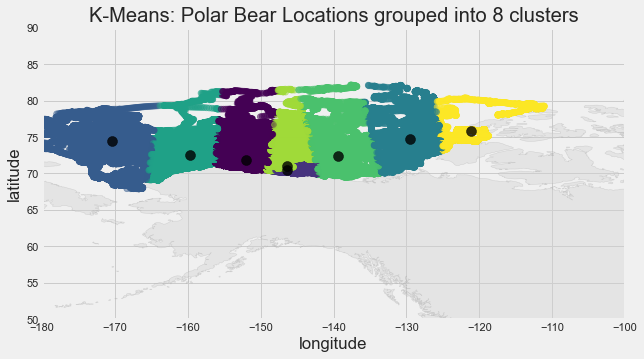

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



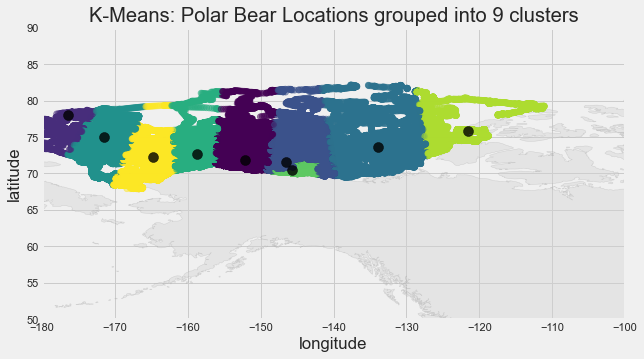

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



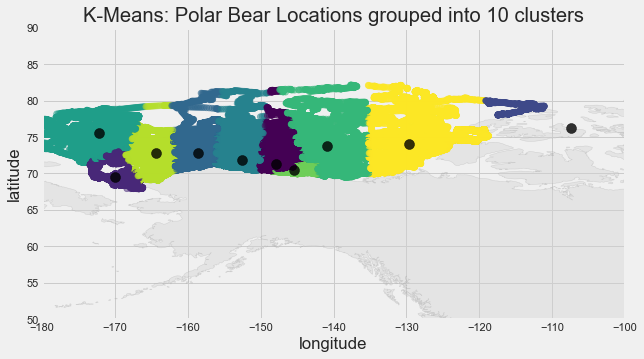

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



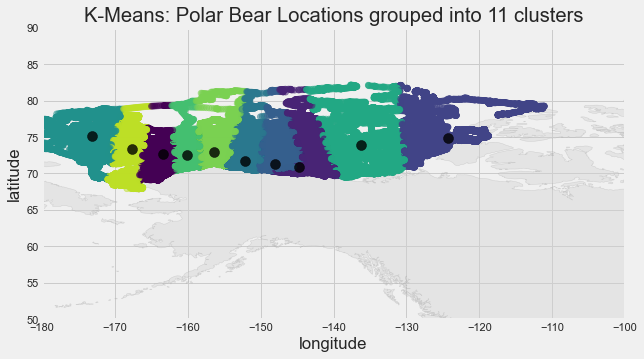

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



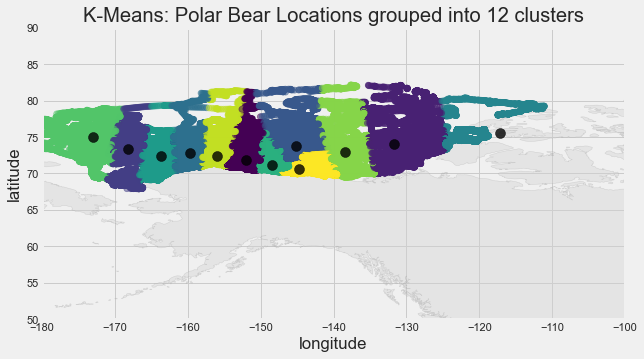

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



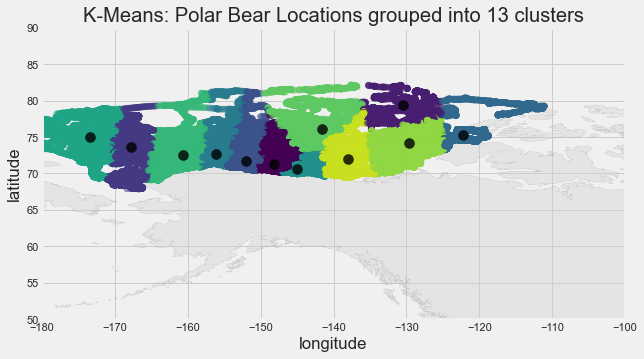

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



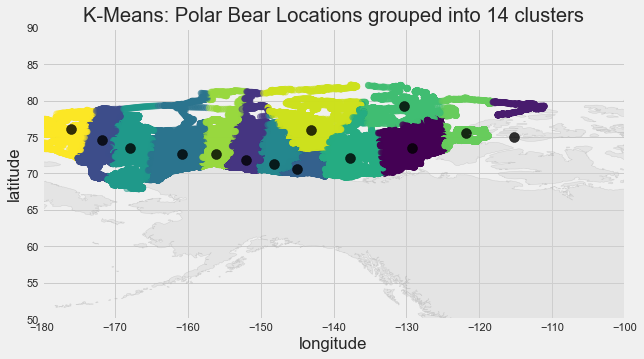

/opt/anaconda3/envs/PythonAdv/lib/python3.6/site-packages/pyproj/crs/crs.py:53: FutureWarning:

'+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6



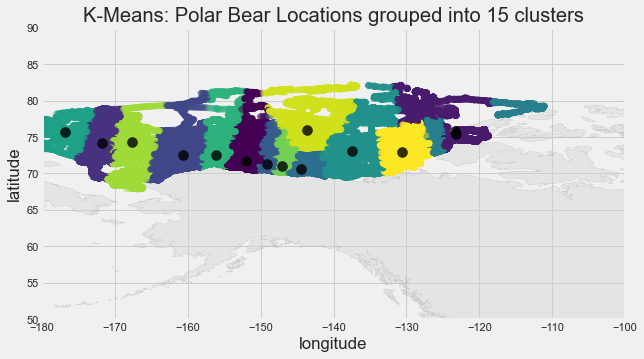

In [22]:
ssd = []

for i in range(2, 16):
    # Find clusters
    km = MiniBatchKMeans(n_clusters=i)
    km.fit_predict(df_bear_filtered)
    
    # Label cluster centers
    centers = km.cluster_centers_
    
    # Calculate sum of squared distances
    ssd.append(km.inertia_)
    
    # Get cluster center
    df_bear_filtered['cluster'] = km.labels_
    
    # Plot lat/long and clusters on map
    plot_geolocation_by_cluster(df_bear_filtered, cluster='cluster', title= f'K-Means: Polar Bear Locations grouped into {i} clusters', centers=centers, filename=f'../../../machine_learning/plots/bear_kmeans_{i}_clusters.png')

In [23]:
def png_to_gif(path_to_images, save_file_path, duration=500):
    frames = []
    images = glob.glob(f'{path_to_images}')
    
    for i in sorted(images): 
        im = Image.open(i)
        im = im.resize((550,389),Image.ANTIALIAS)
        frames.append(im.copy())
    
    frames[0].save(f'{save_file_path}', format='GIF', append_images=frames[1:], save_all=True,
                   duration=duration, loop=0)


In [25]:
png_to_gif(path_to_images='../../../machine_learning/plots/*.png', 
           save_file_path='../../../machine_learning/plots/bear_kmeans_clusters.gif',
           duration=500)



In [26]:
from IPython.display import HTML
HTML('<img src="../../../machine_learning/plots/bear_kmeans_clusters.gif">')

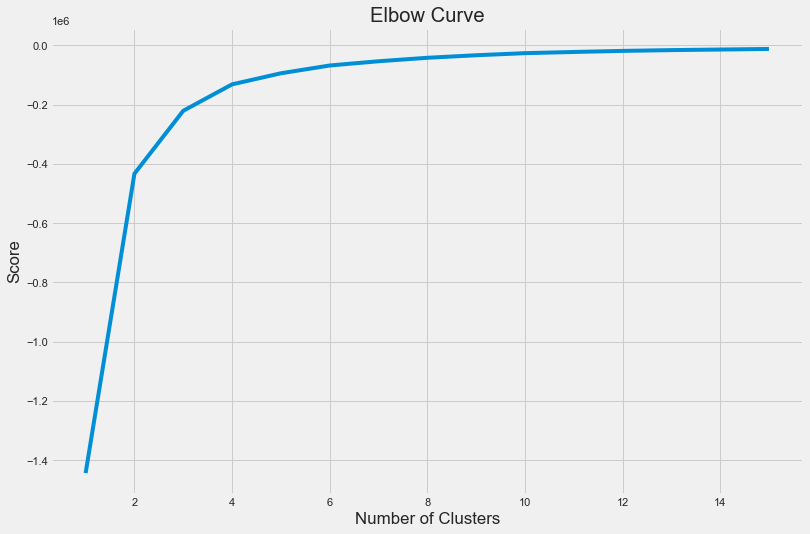

In [33]:
# Run standard Elbow Cuver for KMeans
K_clusters = range(1,16)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]

Y_axis = df_bear_filtered[['lat']]
X_axis = df_bear_filtered[['long']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')

plt.show()

## K-Means Clustering GeoLocation into Groups

# Data Processing

## Group by month, year & bear_id

In [36]:
#Convert GMTdate to datetime format
den_df["GMTdate"]=pd.to_datetime(den_df["GMTdate"])

,bear_id,GMTdate,GMTtime,long,lat,raw_act,standard_act,active_den,habitat
0,pb_20132,2009-04-29,8:30:00,-148.032689,70.525736,131.0,131.0,0,land
1,pb_20132,2009-04-29,9:00:00,-148.032737,70.525732,194.0,194.0,0,land
2,pb_20132,2009-04-29,9:30:00,-148.032779,70.525775,9.0,9.0,0,land
3,pb_20132,2009-04-29,10:00:00,-148.032822,70.525818,205.0,205.0,0,land
4,pb_20132,2009-04-29,10:30:00,-148.032792,70.525817,542.0,542.0,0,land
...,...,...,...,...,...,...,...,...,...
342310,pb_32921,2016-06-20,4:00:00,-136.494285,71.331510,649.0,649.0,0,ice
342311,pb_32921,2016-06-20,4:15:00,-136.483841,71.329289,714.0,714.0,0,ice
342312,pb_32921,2016-06-20,4:30:00,-136.473398,71.327067,696.0,696.0,0,ice
342313,pb_32921,2016-06-20,4:45:00,-136.462958,71.324844,591.0,591.0,0,ice


In [41]:
#Group by BearID, Month and Year
den_df = den_df.groupby(["bear_id", "GMTdate"])\
.agg()
den_df.mea()

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'